In [2]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.datasets import make_moons
import numpy as np

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

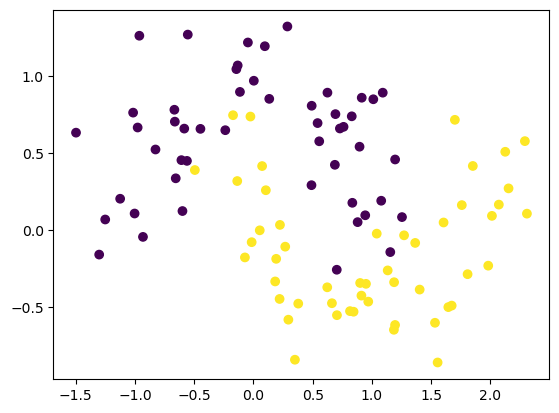

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## 1. He Weight Initialization

In [5]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
initial_weights = model.get_weights()

In [7]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [8]:
model.set_weights(initial_weights)

In [9]:
model.get_weights()

[array([[-0.31411466,  0.39135623, -0.02025045, -0.8784146 ,  0.42475528,
          0.3656989 ,  0.3260372 ,  0.68535066,  0.20465654,  0.42122436],
        [-0.65157217,  0.22606166,  0.594817  , -0.21192168, -0.21451548,
          1.0040812 , -1.2905211 ,  0.18146327,  0.6610297 , -0.70137787]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.6068942 , -0.1885178 ,  0.18919699,  0.3060675 , -0.14675911,
          0.00936859,  0.2744905 ,  0.10435289,  0.19387473, -0.05393744],
        [-0.11164526,  0.10101506,  0.0216902 , -0.543702  ,  0.19831192,
         -0.26869324, -0.3108225 ,  0.04502928, -0.06128839, -0.02116134],
        [-0.18245688, -0.10219201,  0.18994255, -0.54027957, -0.17611663,
          0.6217615 , -0.39714572,  0.43987712, -0.53498733, -0.23136291],
        [ 0.36350453, -0.06543808,  0.5380722 ,  0.27550012,  0.13891844,
         -0.2490041 , -0.28305244, -0.2688736 ,  0.20289868, -0.44048822],
        [-0.85054

In [10]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [11]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 0.5461 - loss: 0.6784 - val_accuracy: 0.3500 - val_loss: 0.6908
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5500 - loss: 0.6732 - val_accuracy: 0.3500 - val_loss: 0.6886
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5148 - loss: 0.6767 - val_accuracy: 0.3500 - val_loss: 0.6871
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5305 - loss: 0.6709 - val_accuracy: 0.3500 - val_loss: 0.6858
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5305 - loss: 0.6691 - val_accuracy: 0.3500 - val_loss: 0.6844
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5344 - loss: 0.6679 - val_accuracy: 0.3500 - val_loss: 0.6829
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5695 - loss: 0.6551 - val_accuracy: 0.3500 - val_loss: 0.6811
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5461 - loss: 0.6565 - val_accuracy: 0.3500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step


<Axes: >

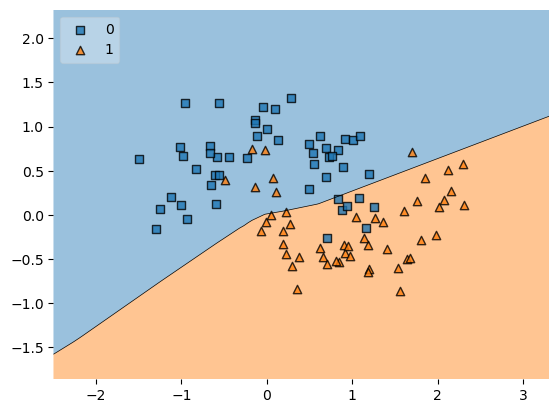

In [12]:
plot_decision_regions(X,y,clf=model,legend=2)

## 2. Xaviour/Glorate Weight Initialization

In [13]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.6555 - loss: 0.6864 - val_accuracy: 0.8000 - val_loss: 0.6717
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6992 - loss: 0.6744 - val_accuracy: 0.7500 - val_loss: 0.6615
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7258 - loss: 0.6652 - val_accuracy: 0.8000 - val_loss: 0.6503
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7258 - loss: 0.6569 - val_accuracy: 0.8000 - val_loss: 0.6394
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7180 - loss: 0.6493 - val_accuracy: 0.8000 - val_loss: 0.6278
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7258 - loss: 0.6374 - val_accuracy: 0.8000 - val_loss: 0.6165
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7180 - loss: 0.6295 - val_accuracy: 0.8000 - val_loss: 0.6050
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7023 - loss: 0.6257 - val_accuracy: 0.8000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step


<Axes: >

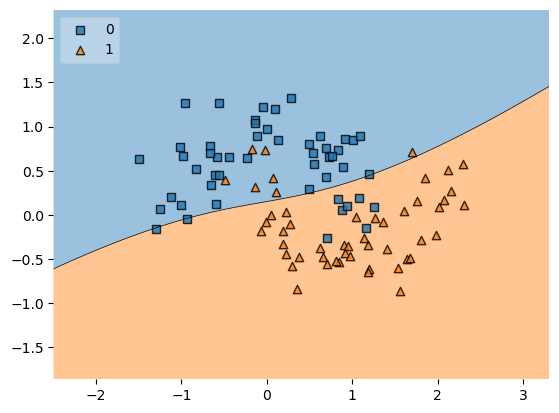

In [16]:
plot_decision_regions(X,y,clf=model,legend=2)